# Hand Written Digit Recognition using k-Nearest Neighbour Classifier
---

In [1]:
import random
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
# Reading Dataset
training_image = r'..\dataset\train-images.idx3-ubyte'
training_label = r'..\dataset\train-labels.idx1-ubyte'
testing_image = r'..\dataset\t10k-images.idx3-ubyte'
testing_label = r'..\dataset\t10k-labels.idx1-ubyte'

In [3]:
# Converting to Traning & Test Data
x_train, y_train = loadlocal_mnist(training_image, training_label)
x_test, y_test = loadlocal_mnist(testing_image, testing_label)

In [4]:
# Reshaping Data for Ploting
x_train_r = x_train.reshape(60000, 28, 28)
x_test_r = x_test.reshape(10000, 28, 28)

In [5]:
# Dimesity of Traning & Testing Data
print('Dimension of training images:', np.shape(x_train))
print('Dimension of trainig labels:',np.shape(y_train))
print('Dimension of testing images:', np.shape(x_test))
print('Dimension of testing labels:',np.shape(y_test))
print()
print('Dimension of *training images:', np.shape(x_train_r))
print('Dimension of *testing images:', np.shape(x_test_r))

Dimension of training images: (60000, 784)
Dimension of trainig labels: (60000,)
Dimension of testing images: (10000, 784)
Dimension of testing labels: (10000,)

Dimension of *training images: (60000, 28, 28)
Dimension of *testing images: (10000, 28, 28)


In [6]:
# Creating a KNN Classifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [7]:
# Prediction using KNN Classifier
prediction = classifier.predict(x_test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
# Generating Confusion Matrix using Prediction value
c_matrix = confusion_matrix(y_test, y_pred=prediction)
c_matrix

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]],
      dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Value')

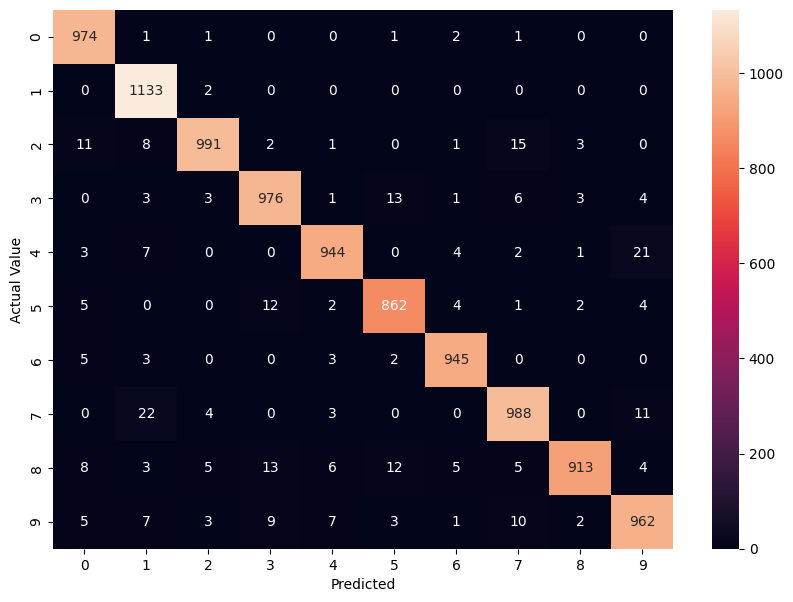

In [9]:
# Generation Heatmap of Confusion Matrix
plt.figure(figsize=(10, 7))
sn.heatmap(c_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual Value')

In [10]:
# Accuracy of Model
print(f'Accuracy: {classifier.score(x_test, y_test)}')

Accuracy: 0.9688


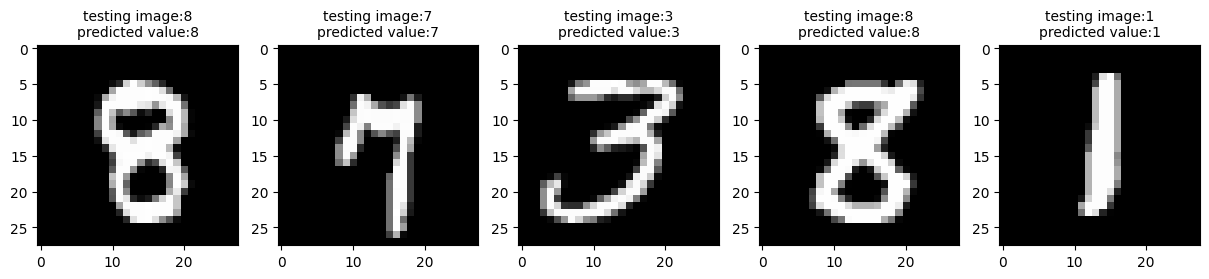

In [11]:
# Choosing 5 image to display at random
image = list()
title = list()

for i in range(5):
    r = random.randint(1, len(x_test_r))
    image.append(x_test_r[r])
    p = classifier.predict(x_test[r].reshape(1, -1))[0]
    title.append('testing image:' + str(y_test[r]) + '\npredicted value:' + str(p))

plt.figure(figsize=(15, 10))
position = 1

for x in zip(image, title):
    image = x[0]
    title = x[1]

    plt.subplot(2, 5, position)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(title, fontsize=10)

    position += 1

---